## Data Wrangling

### Read the table and cleaning

In [41]:
/* read the table */

FILENAME REFFILE '/folders/myfolders/data/noshowcopy.csv';
PROC IMPORT DATAFILE=REFFILE
    DBMS=CSV
    OUT=noshow;
    GETNAMES=YES;
RUN;


In [2]:
/* Check the data*/

proc print data = noshow (firstobs= 1 obs = 5);
run;

Obs,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
1,2.99E13,5642903,F,20160429T183808+0000,20160429T000000+0000,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5.59E14,5642503,M,20160429T160827+0000,20160429T000000+0000,56,JARDIM DA PENHA,0,0,0,0,0,0,No
3,4.26E12,5642549,F,20160429T161904+0000,20160429T000000+0000,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,868000000000,5642828,F,20160429T172931+0000,20160429T000000+0000,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5,8.84E12,5642494,F,20160429T160723+0000,20160429T000000+0000,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
/* check structure of the data */

Proc contents data= noshow;
run;

In [4]:
/* change column name of the data */
data noshow; 
set noshow;
    rename  Hipertension = Hypertension
            Handcap = Handicap;        
run;

In [5]:

/* check missing value  */
/* numeric value column */

proc means data = noshow n nmiss; var _numeric_;
run;

Variable,N,N Miss
PatientId AppointmentID ScheduledDay AppointmentDay Age Scholarship Hypertension Diabetes Alcoholism Handicap SMS_received,110527 110527 110527 110527 110527 110527 110527 110527 110527 110527 99885,0 0 0 0 0 0 0 0 0 0 10642


In [6]:
/* summary statistics */
proc means data = noshow; var age;
run;

In [7]:
/* categorical variable */
proc freq data = noshow; table gender;
run;

Gender,Frequency,Percent,CumulativeFrequency,CumulativePercent
F,71840,65.00,71840,65.00
M,38687,35.00,110527,100.00


In [8]:
proc univariate data = noshow;
var age;
run;

In [9]:
data noshow;
set noshow;
drop var neighbourhood;
run;

In [10]:
proc print data = noshow;
where age <0;
run;

Obs,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99833,4.66E14,5775010,F,20160606T085813+0000,20160606T000000+0000,-1,0,0,0,0,0,0,No


In [11]:
data noshow;
length No_show $ 40 gender $ 10 ;
set noshow;
format No_show gender;
informat No_show gender;
run;

In [12]:
data noshow;
set noshow;
if age<0 then delete;
run;

## exploratory analysis

In [13]:
data noshow;
set noshow;
if No_show = 'No' then No_show = 'Showed up';
else No_show = 'not showed up';
run;


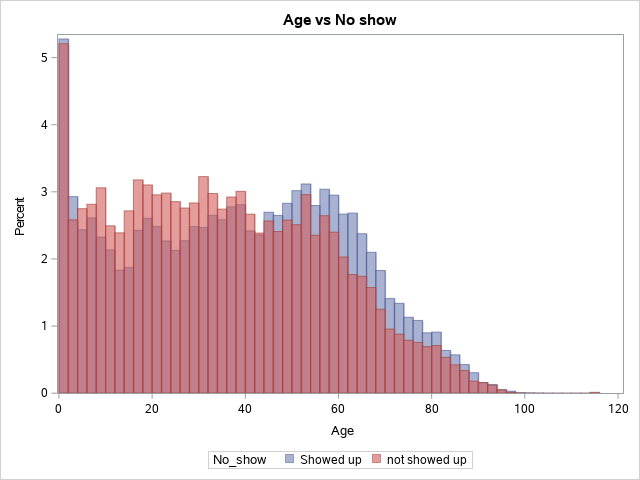

In [14]:
/* age vs no show histogram */
proc sgplot data=noshow;
histogram age / group=No_show transparency= 0.4 ; title 'Age vs No show';
run;


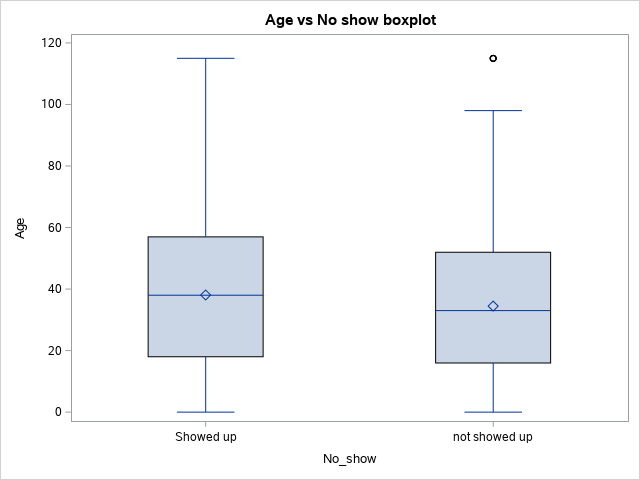

In [15]:
/* age vs noshow box plot */
PROC SGPLOT DATA=noshow; VBOX Age
  / category = No_show;
title 'Age vs No show boxplot'; run;


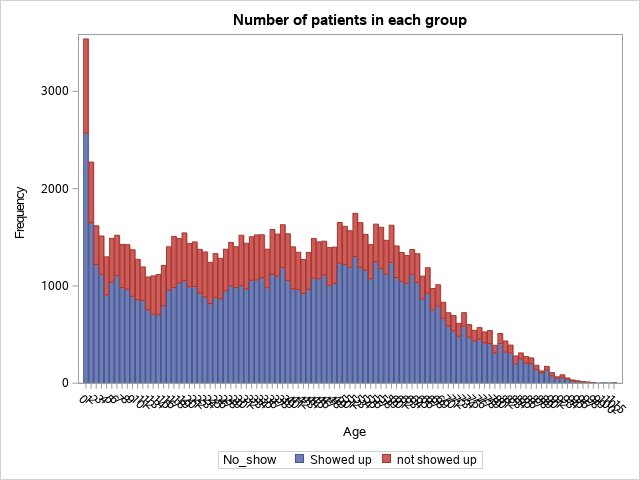

In [16]:
/* bar diagram of age vs no show */
proc SGPLOT DATA = noshow;
vbar age / group= No_show;
title 'Number of patients in each group'; run;


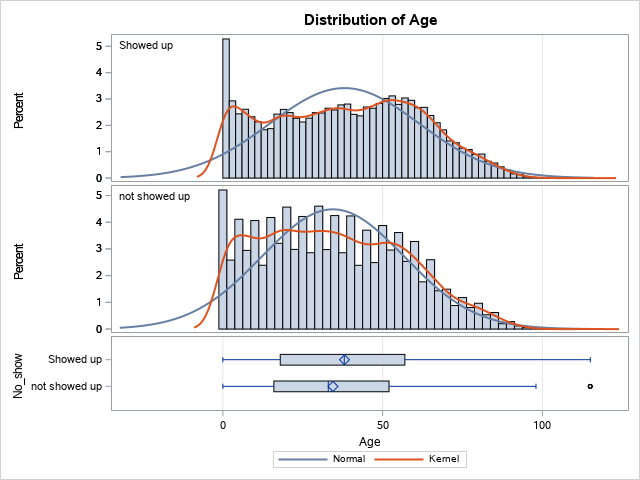
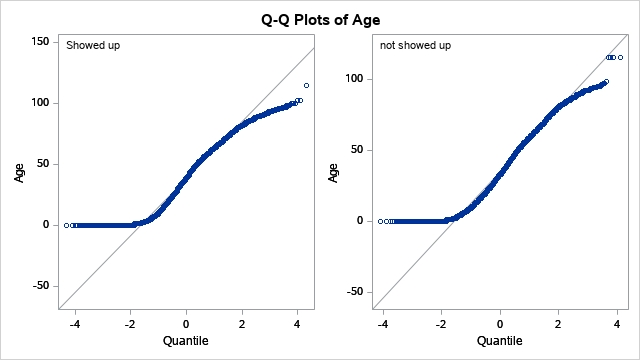

In [17]:
/* t test */
proc ttest data=noshow sides=2 h0=0 plots(showh0); class No_show;
var Age;
run;

In [18]:
/* gender vs no show */



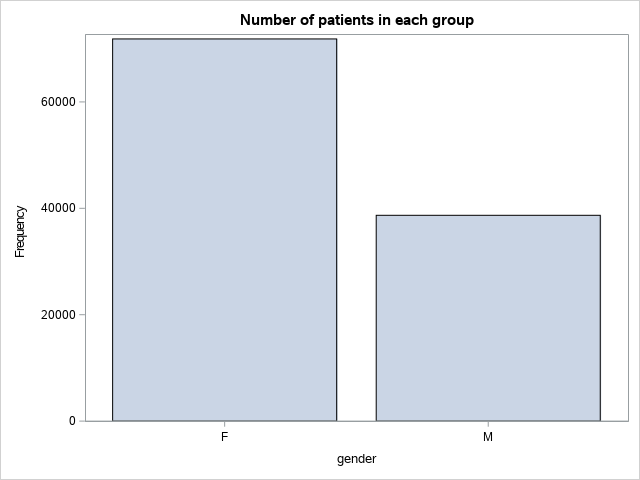

In [19]:
/* bar diagram */
proc SGPLOT DATA = noshow;
vbar Gender;
title 'Number of patients in each group'; run;


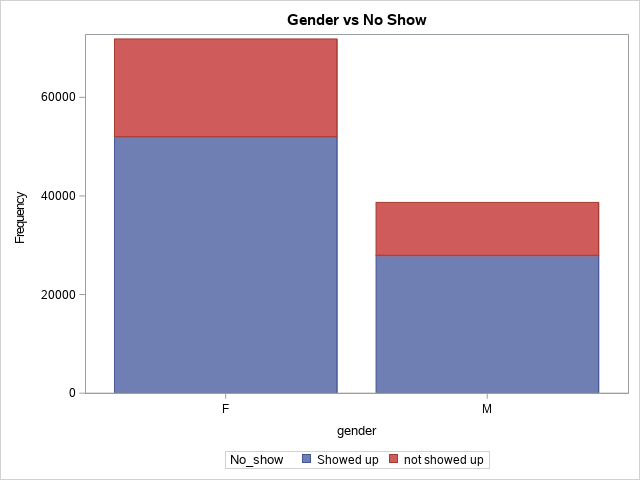

In [20]:
/* stacked bar diagram */
proc SGPLOT DATA = noshow; vbar Gender / group= No_show; title 'Gender vs No Show'; run;


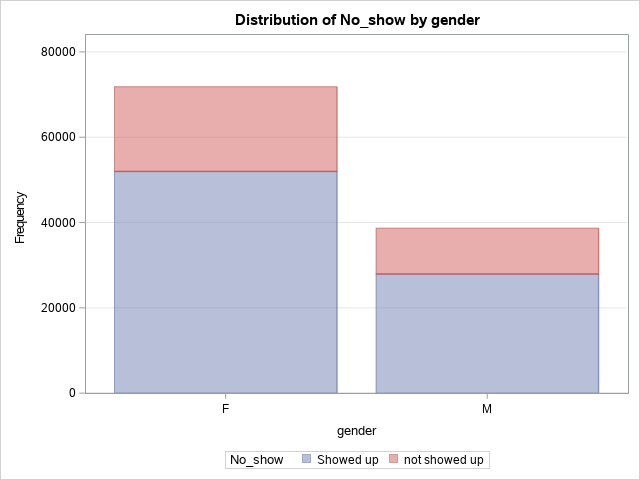

In [21]:
/* other way */
proc freq data=noshow order=freq;
tables No_show*Gender / plots=freqplot(twoway=stacked ); run;


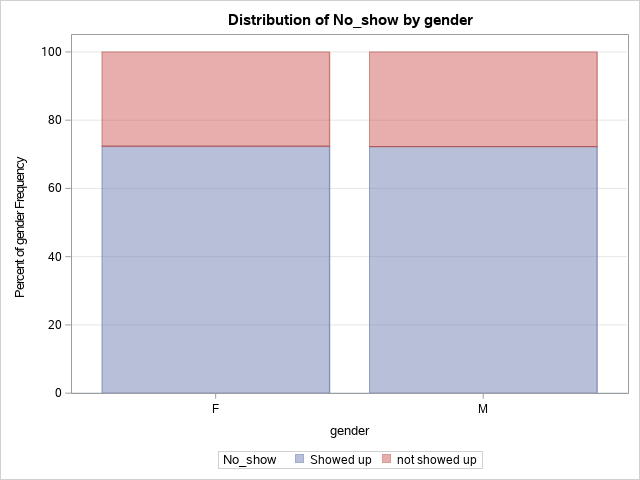

In [22]:
/* proportion */
proc freq data=noshow order=freq;
tables No_show*Gender / plots=freqplot(twoway=stacked scale = grouppct); run;


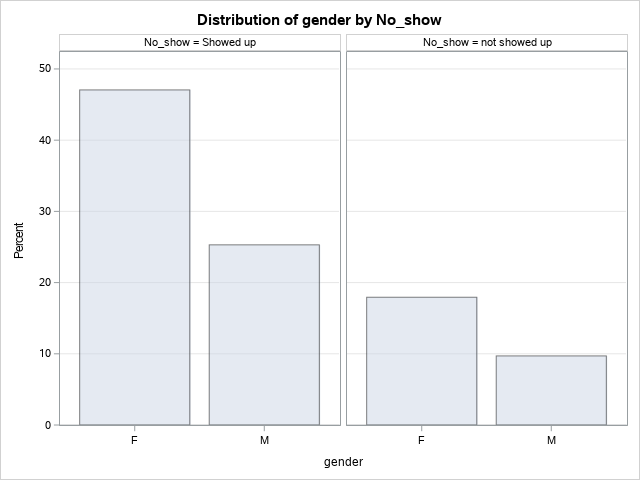

In [23]:
/* chi square test */
/* with plot */
proc freq data=noshow;
tables (gender)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent)); run;

In [24]:
/* simple way */
proc freq data=noshow;
tables (gender)*(No_show) / chisq; run;


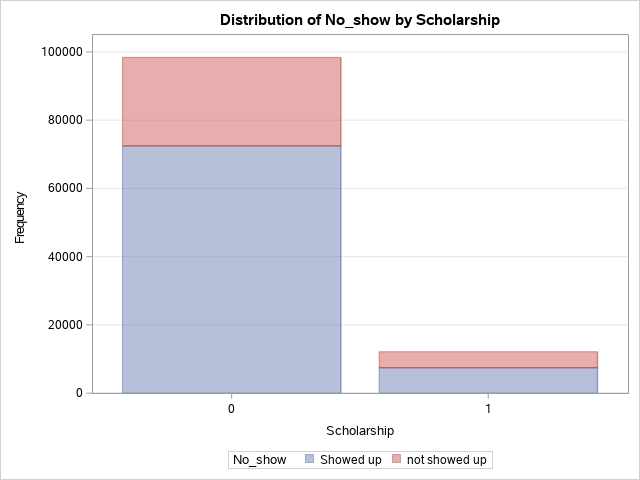

In [25]:
/* no show vs scholarship */
proc freq data=noshow order=freq;
tables No_show*scholarship/ plots=freqplot(twoway=stacked ); run;


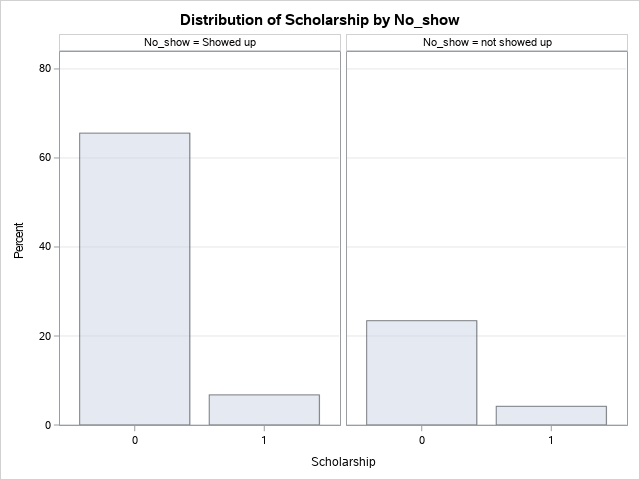

In [26]:
proc freq data=noshow;
tables (scholarship)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent)); run;


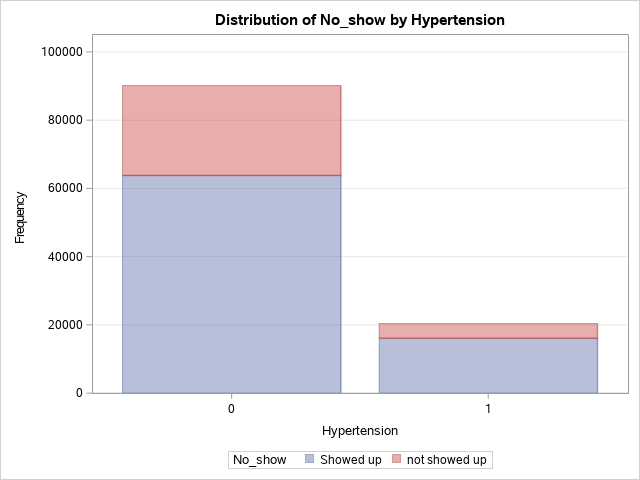

In [27]:
/* no show vs Hypertension*/
proc freq data=noshow order=freq;
tables No_show*hypertension/ plots=freqplot(twoway=stacked ); run;


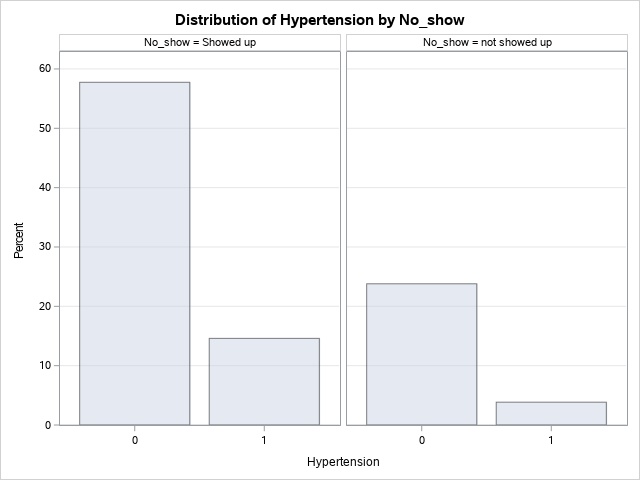

In [28]:
proc freq data=noshow;
tables (hypertension)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent)); run;


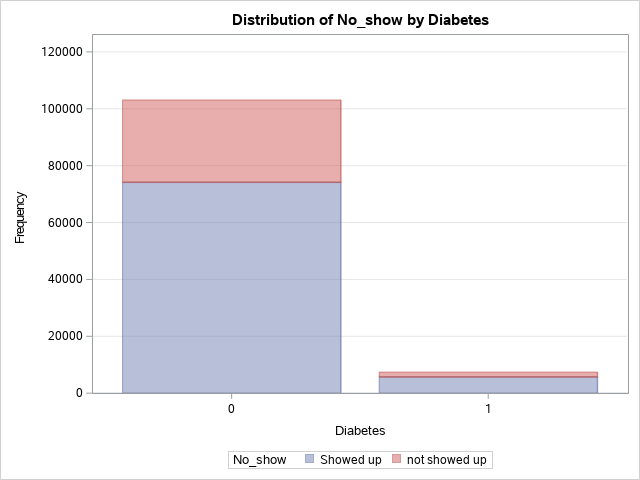

In [29]:
/* no show vs diabetes*/
proc freq data=noshow order=freq;
tables No_show*diabetes/ plots=freqplot(twoway=stacked ); run;


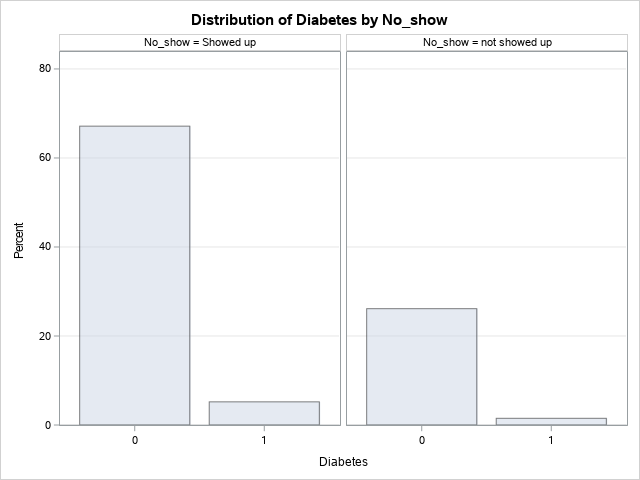

In [30]:
proc freq data=noshow;
tables (diabetes)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent));
run;


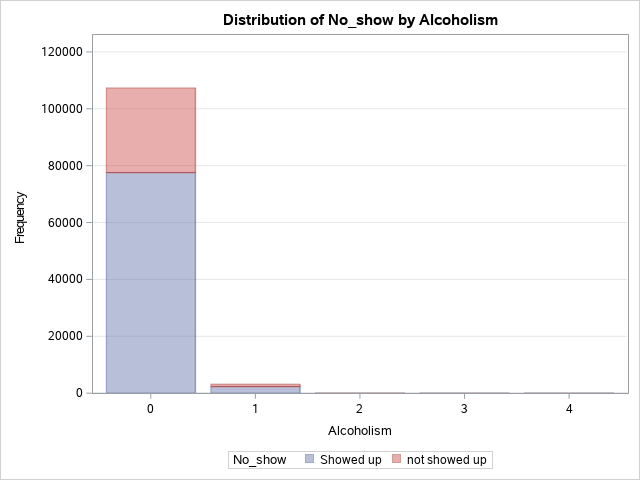

In [31]:
/* no show vs alcoholism*/
proc freq data=noshow order=freq;
tables No_show*alcoholism/ plots=freqplot(twoway=stacked ); run;


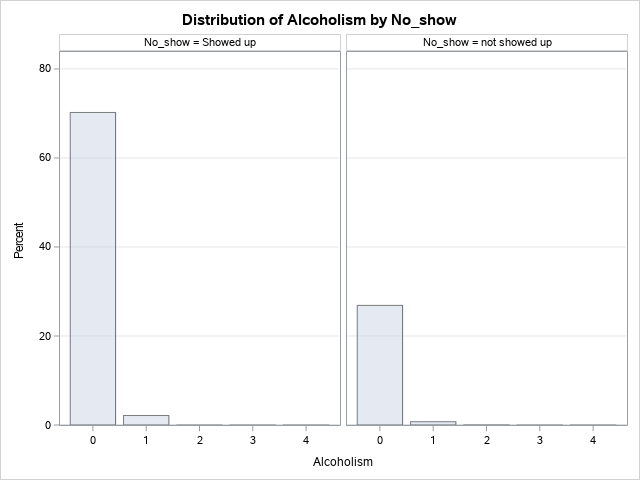

In [32]:
proc freq data=noshow;
tables (alcoholism)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent)); run;


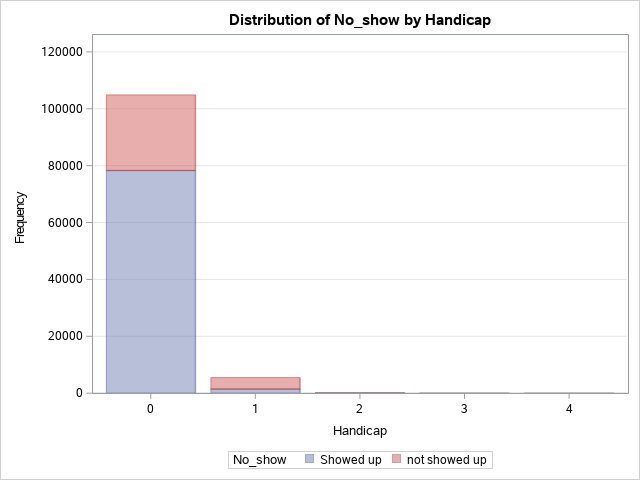

In [33]:
/* no show vs handicap*/
proc freq data=noshow order=freq;
tables No_show*handicap/ plots=freqplot(twoway=stacked ); run;


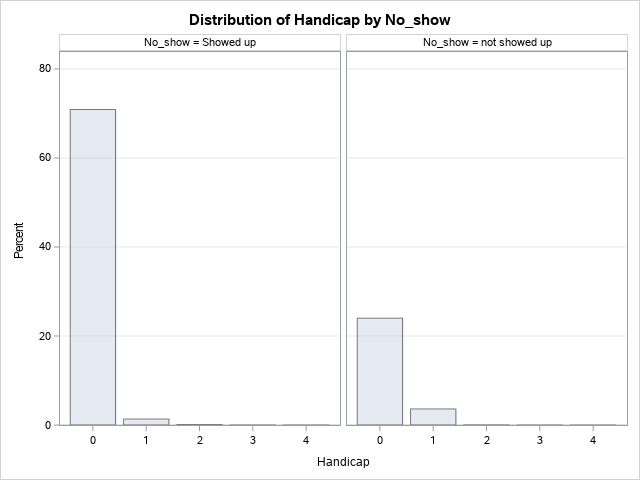

In [34]:
proc freq data=noshow;
tables (handicap)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent)); run;


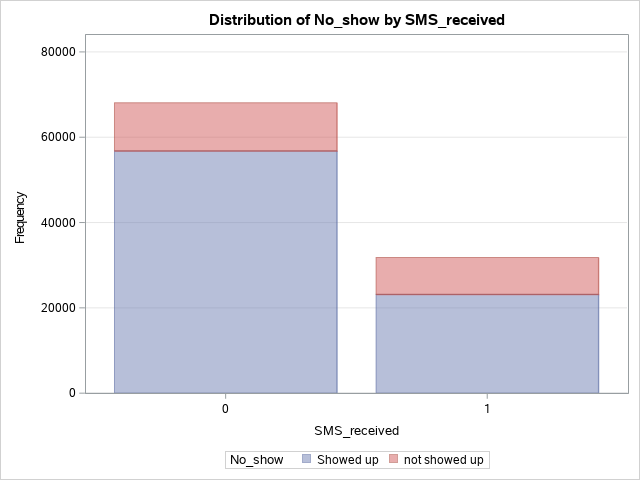

In [35]:
/* no show vs sms received*/
proc freq data=noshow order=freq;
tables No_show*sms_received/ plots=freqplot(twoway=stacked ); run;


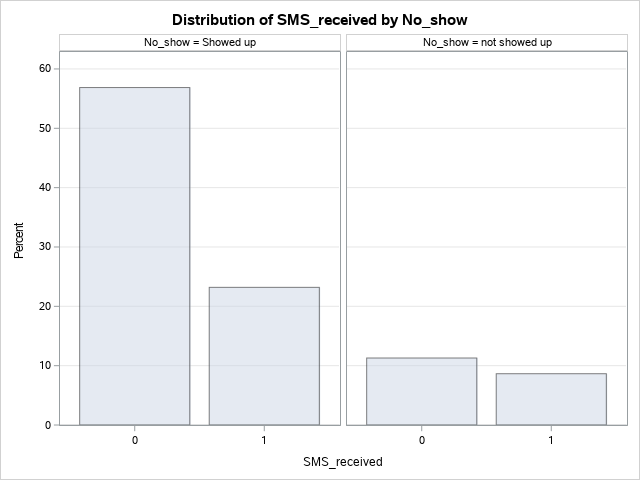

In [36]:
proc freq data=noshow;
tables (sms_received)*(No_show) / chisq plots=(freqplot(twoway=grouphorizontal scale=percent)); run;


appointment days vs No show 
Neighborhood vs No show

In [37]:
proc logistic data=noshow;
class gender Scholarship Hypertension Diabetes Alcoholism Handicap
SMS_received / param=glm;
model No_show(event='showed up')=gender 
Scholarship Hypertension Diabetes Alcoholism Handicap 
SMS_received Age / link=logit selection=backward slstay=0.05 hierarchy=single technique=fisher;
run;